# データの生成　dataset.py

In [32]:
import numpy as np

class Wave(object):
    def __init__(self,data_num,wave_len=200,noise_power=0.5):
        self.wave_len = wave_len
        self.data_num = data_num
        self.noise_power = noise_power
        
        self.interval = np.arange(0,1,1/self.wave_len)
 
    def generate(self):
        # オリジナルの波形
        xorg = np.zeros((self.wave_len,self.data_num))
        # ノイズ込みの波形
        xnois = np.zeros((self.wave_len,self.data_num))
        
        for i in range(self.data_num):
            Ampl = np.random.rand()
            freq = 20 * np.random.rand() + 10
            norm = np.random.rand()
            
            xorg[:,i] = Ampl * np.sin(freq * self.interval) + norm
            xnois[:,i] = xorg[:,i] + self.noise_power * np.random.rand(self.wave_len)
        
        return xorg, xnois

In [33]:
import matplotlib.pyplot as plt
data = Wave(10)
a, b = data.generate()

(200,)


[3.96894355 3.85518494 4.2431167  4.01757238 4.08357196 4.27075538
 3.86021055 4.20236137 4.28204615 4.22194052]


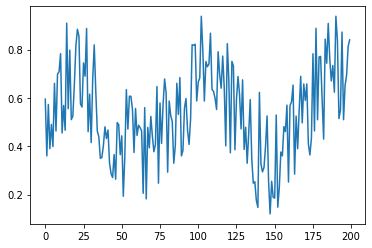

In [37]:
plt.plot(b[:,0])
print(np.linalg.norm(a-b, ord=2, axis=0))

# 層 layer.py

In [17]:
import numpy as np

class FullyConnectedLayer(object):
    def __init__(self, input_dim, output_dim):
        self.__weight = 0.5 * np.random.rand(output_dim,input_dim)
        self.__bias = 0.5 * np.random.rand(output_dim)
    
    @property
    def weight(self):
        return self.__weight
    
    @weight.setter
    def weight(self, new_weight):
        self.__weight = new_weight
        
    @property
    def bias(self):
        return self.__bias
    
    @bias.setter
    def bias(self, new_bias):
        self.__bias = new_bias
       
        
    def forward(self, x):
        return np.dot(self.__weight, x) + self.__bias


# 活性化関数 activation.py

In [5]:
import numpy as np

def sigmoid(self,x):
    return 1.0 / (1.0 + np.exp(-x))

# モデル構成 model.py

In [6]:
import numpy as np
from layer import FullyConnectedLayer
import activation

class DAEModel(object):
    def __init__(self,layers):
        self.layers = layers
        
        self.layer1 = FullyConnectedLayer(self.layers[0], self.layers[1])
        self.layer2 = FullyConnectedLayer(self.layers[1], self.layers[2])
        
    def forward(self,inputs):
        c1 = self.layer1.forward(inputs)
        x2 = activation.sigmoid(c1)
        c2 = self.layer2.forward(x2)
        outputs = activation.sigmoid(c2)
        return x2, outputs
    

ModuleNotFoundError: No module named 'layer'

# 損失関数 losses.py

In [7]:
import numpy as np

class LeastSquaresError(object):
    def calc_loss(self,pred,ans):
        return np.mean(np.linalg.norm(pred-ans, ord=2, axis=0))

# 最適化 optim.py

In [8]:
import numpy as np

class GradientDescent(object):
    def __init__(self,model,data_num):
        self.model = model
        self.data_num = data_num
        
        self.grad_b2 = None
        self.grad_w2 = None
        self.grad_b1 = None
        self.grad_w1 = None
        
    def calc_grad(self,inputs,middles,outputs,corrects):
        self.grad_b2 = np.zeros(len(outputs))
        self.grad_w2 = np.zeros((len(outputs),len(middles)))
        self.grad_b1 = np.zeros(len(middles))
        self.grad_w1 = np.zeros((len(middles),len(inputs)))
        
        # 出力層のバイアスの勾配の導出
        self.grad_b2 = (2/wave_len) * outputs * (1 - outputs) * (outputs - corrects)
        
        # 出力層の重みの勾配の導出
        for l, x2 in enumerate(middles):
            self.grad_w2[l] = x2 * self.grad_b2
        
        # 中間層のバイアスの勾配の導出
        for m in range(len(middles)):
            self.grad_b1[m] = middles * (1 - middles) * np.sum(self.grad_b2 * self.model.layer2.weight()[:,m])
        
        # 中間層の重みの勾配の導出
        for n, x1 in enumerate(inputs):
            self.grad_w1[n] = x1 * self.grad_b1
            
        # データ数で除算する
        self.grad_b2 = self.grad_b2 / self.data_num
        self.grad_w2 = self.grad_w2 / self.data_num
        self.grad_b1 = self.grad_b1 / self.data_num
        self.grad_w1 = self.grad_w1 / self.data_num
        
    def update(self,inputs,middles,outputs,corrects,gamma=0.01):
        calc_grad(inputs,middles,outputs,corrects)
        
        new_bias2 = self.model.layer2.bias() - gamma * self.grad_b2
        self.model.layer2.bias(new_bias2)
        
        new_weight2 = self.model.layer2.weight() - gamma * self.grad_w2
        self.model.layer2.bias(new_weight2)
        
        new_bias1 = self.model.layer1.bias() - gamma * self.grad_b1
        self.model.layer2.bias(new_bias1)
        
        new_weight1 = self.model.layer1.weight() - gamma * self.grad_w1
        self.model.layer2.bias(new_weight1)
        

# Trainning

In [7]:
from tqdm import tqdm

import numpy as np
from dataset import Wave

from model import DAEModel
from loss import LeastSquaresError
from optim import GradientDescent

def train():
    training_wave = Wave(100,200)
    test_wave = Wave(10,200)
    
    tr_org, tr_nois = training_wave.generate()
    te_org, te_nois = test_wave.generate()
    
    model = DAEModel([200,120,200])
    loss_func = LeastSquaresError()
    optim = GradientDescent(model,200)
    
    for i in tqdm(range(10)):
        middles, outputs = model.forward(tr_nois)
        L = loss_func.calc_loss(outputs,tr_org)
        print(L)
        optim.update(tr_nois,middles,outputs,tr_org,lr=0.01)

train()

  0%|          | 0/10 [00:00<?, ?it/s]

[[0.54906881 0.56104111 0.90118618 ... 0.9772616  1.35986182 0.25673127]
 [0.60471782 0.51294013 0.89613809 ... 1.19780701 1.15441456 0.62774974]
 [0.63815549 0.54656296 0.86847514 ... 1.02600182 1.2723259  0.75432323]
 ...
 [0.76829083 0.92975826 0.91857943 ... 0.9847471  1.43874927 0.96265587]
 [0.65797181 0.9412708  0.67789827 ... 0.85139878 1.40906345 1.2472723 ]
 [0.90242692 0.97605811 0.58713948 ... 0.75418806 1.76942744 1.16395652]]


TypeError: sigmoid() missing 1 required positional argument: 'x'